In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta 
from matplotlib import dates as mpl_dates
import datetime as dt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.offline as pyo
import folium

In [2]:
df = pd.read_excel('Livestock-Population.xlsx')
df

,Year,CATTLE,BUFFALOES,SHEEP,GOAT,PIGS,FOWL,DUCK,MILKING COW,MILKING BUFFALOES,LAYING HEN,LAYING DUCK
0,2008/09,7175198,4680486,802993,8473082,1044498,24481286,383123.00,932876,1211495,7124054,179187
1,2009/10,7199260,4836984,801371,8844172,1064858,25760373,379753.00,954680,1252770,7290875,175300
2,2010/11,7226050,4993650,805070,9186440,1108465,40000000,378050.00,974122,1291644,7478645,175150
3,2011/12,7244944,5133139,807267,9512958,1137489,45171185,376916.00,998963,1331037,7907468,174978
4,2012/13,7274022,5241873,809536,9786354,1160035,47959239,375975.18,1025591,1369796,8233616,174714
5,2013/14,7243916,5178612,789216,10177531,1190138,48079406,390209.00,1024513,1345837,8350237,179447
6,2014/15,7241743,5167737,789292,10251569,1203230,50195285,390287.00,1025947,1345164,8412247,179480
7,2015/16,7302808,5168809,800658,10986114,1291308,68630638,392255.00,1026135,1355384,12353515,180927
8,2016/17,7347487,5177918,801975,11165099,1328036,70007151,394775.00,1029529,1509512,12388889,183940
9,2017/18,7376306,5277819,800749,11647319,1435369,72245732,404670.00,1039538,1535948,12517558,186912


In [3]:
df = df.rename(columns={'CATEGORY': 'Livestock'})
df

,Year,CATTLE,BUFFALOES,SHEEP,GOAT,PIGS,FOWL,DUCK,MILKING COW,MILKING BUFFALOES,LAYING HEN,LAYING DUCK
0,2008/09,7175198,4680486,802993,8473082,1044498,24481286,383123.00,932876,1211495,7124054,179187
1,2009/10,7199260,4836984,801371,8844172,1064858,25760373,379753.00,954680,1252770,7290875,175300
2,2010/11,7226050,4993650,805070,9186440,1108465,40000000,378050.00,974122,1291644,7478645,175150
3,2011/12,7244944,5133139,807267,9512958,1137489,45171185,376916.00,998963,1331037,7907468,174978
4,2012/13,7274022,5241873,809536,9786354,1160035,47959239,375975.18,1025591,1369796,8233616,174714
5,2013/14,7243916,5178612,789216,10177531,1190138,48079406,390209.00,1024513,1345837,8350237,179447
6,2014/15,7241743,5167737,789292,10251569,1203230,50195285,390287.00,1025947,1345164,8412247,179480
7,2015/16,7302808,5168809,800658,10986114,1291308,68630638,392255.00,1026135,1355384,12353515,180927
8,2016/17,7347487,5177918,801975,11165099,1328036,70007151,394775.00,1029529,1509512,12388889,183940
9,2017/18,7376306,5277819,800749,11647319,1435369,72245732,404670.00,1039538,1535948,12517558,186912


In [4]:
df.columns = df.columns.str.replace(r'\n','', regex=True)
df.columns

Index(['Year', 'CATTLE', 'BUFFALOES', 'SHEEP', 'GOAT', 'PIGS', 'FOWL', 'DUCK',
       'MILKING COW', 'MILKING BUFFALOES', 'LAYING HEN', 'LAYING DUCK'],
      dtype='object')

In [5]:
df1 = df.groupby('Year')['CATTLE', 'BUFFALOES', 'SHEEP', 'GOAT', 'PIGS', 'FOWL', 'DUCK'].sum().reset_index()
df1

C:\ProgramData\AC\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Year,CATTLE,BUFFALOES,SHEEP,GOAT,PIGS,FOWL,DUCK
0,2008/09,7175198,4680486,802993,8473082,1044498,24481286,383123.00
1,2009/10,7199260,4836984,801371,8844172,1064858,25760373,379753.00
2,2010/11,7226050,4993650,805070,9186440,1108465,40000000,378050.00
3,2011/12,7244944,5133139,807267,9512958,1137489,45171185,376916.00
4,2012/13,7274022,5241873,809536,9786354,1160035,47959239,375975.18
5,2013/14,7243916,5178612,789216,10177531,1190138,48079406,390209.00
6,2014/15,7241743,5167737,789292,10251569,1203230,50195285,390287.00
7,2015/16,7302808,5168809,800658,10986114,1291308,68630638,392255.00
8,2016/17,7347487,5177918,801975,11165099,1328036,70007151,394775.00
9,2017/18,7376306,5277819,800749,11647319,1435369,72245732,404670.00


In [6]:
ts = df1.set_index('Year').reset_index()
ts

,Year,CATTLE,BUFFALOES,SHEEP,GOAT,PIGS,FOWL,DUCK
0,2008/09,7175198,4680486,802993,8473082,1044498,24481286,383123.00
1,2009/10,7199260,4836984,801371,8844172,1064858,25760373,379753.00
2,2010/11,7226050,4993650,805070,9186440,1108465,40000000,378050.00
3,2011/12,7244944,5133139,807267,9512958,1137489,45171185,376916.00
4,2012/13,7274022,5241873,809536,9786354,1160035,47959239,375975.18
5,2013/14,7243916,5178612,789216,10177531,1190138,48079406,390209.00
6,2014/15,7241743,5167737,789292,10251569,1203230,50195285,390287.00
7,2015/16,7302808,5168809,800658,10986114,1291308,68630638,392255.00
8,2016/17,7347487,5177918,801975,11165099,1328036,70007151,394775.00
9,2017/18,7376306,5277819,800749,11647319,1435369,72245732,404670.00


In [8]:
trace0 = go.Scatter(
x= ts.Year,
y= ts.CATTLE,
mode = 'lines',
name = 'CATTLE'
)

trace1 = go.Scatter(
x= ts.Year,
y= ts.BUFFALOES,
mode = 'lines',
name = 'BUFFALOES'
)

trace2 = go.Scatter(
x= ts.Year,
y= ts.SHEEP,
mode = 'lines',
name = 'SHEEP'
)

trace3 = go.Scatter(
x= ts.Year,
y= ts.GOAT,
mode = 'lines',
name = 'GOAT'
)

trace4 = go.Scatter(
x= ts.Year,
y= ts.PIGS,
mode = 'lines',
name = 'PIGS'
)


data = [trace0, trace1, trace2, trace3, trace4] 
layout = go.Layout(title = 'Trend of Livestock Poupulation of Nepal')
figure = go.Figure(data=data, layout=layout)


figure.update_layout(
    annotations=[
        dict(
            x=-0.07,
            y=-0.15,
            showarrow=False,
            text="Dr. Sachin Subedi",
            xref="paper",
            yref="paper",
            )
            ,   
    ],

)

figure.update_xaxes(title_text="Year")

figure.update_yaxes(title_text="Livestock Population")
figure.show()

In [9]:
trace0 = go.Scatter(
x= ts.Year,
y= ts.FOWL,
mode = 'lines',
name = 'FOWL'
)

trace1 = go.Scatter(
x= ts.Year,
y= ts.DUCK,
mode = 'lines',
name = 'DUCK'
)


data = [trace0, trace1] 
layout = go.Layout(title = 'Trend of Birds Poupulation of Nepal')
figure = go.Figure(data=data, layout=layout)


figure.update_layout(
    annotations=[
        dict(
            x=-0.07,
            y=-0.15,
            showarrow=False,
            text="Dr. Sachin Subedi",
            xref="paper",
            yref="paper",
            )
            ,   
    ],

)

figure.update_xaxes(title_text="Year")

figure.update_yaxes(title_text="Birds Population")
figure.show()

In [10]:
df2 = (df1.loc[df['Year'] == '2017/18'])
df2

,Year,CATTLE,BUFFALOES,SHEEP,GOAT,PIGS,FOWL,DUCK
9,2017/18,7376306,5277819,800749,11647319,1435369,72245732,404670.0


In [11]:
df2.columns = df2.columns.str.replace(r'\n','', regex=True)
df2.columns

Index(['Year', 'CATTLE', 'BUFFALOES', 'SHEEP', 'GOAT', 'PIGS', 'FOWL', 'DUCK'], dtype='object')

In [12]:
df3 = df2.groupby('Year')['CATTLE', 'BUFFALOES', 'SHEEP', 'GOAT', 'PIGS', 'FOWL', 'DUCK'].sum()
df3

C:\ProgramData\AC\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,CATTLE,BUFFALOES,SHEEP,GOAT,PIGS,FOWL,DUCK
Year,,,,,,,
2017/18,7376306,5277819,800749,11647319,1435369,72245732,404670.0


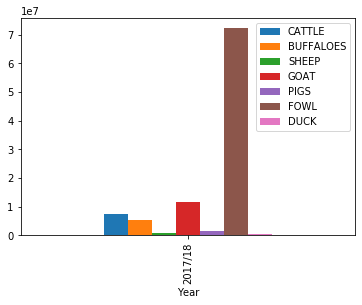

In [13]:
df3.plot.bar()

In [14]:
fig = px.bar(
    ts,
    x = "Year",
    y = "FOWL",
    title= "FOWL Trend",
   color_discrete_sequence=["blue"], 
    height=500,
    width=800)


fig.update_layout(
    annotations=[
        dict(
            x=-0.11,
            y=-0.24,
            showarrow=False,
            text="Dr. Sachin Subedi",
            xref="paper",
            yref="paper",
            )
            ,   
    ],

)
fig.show()

In [15]:
d = df.groupby('Year')['MILKING COW', 'MILKING BUFFALOES'].sum().reset_index()
d

C:\ProgramData\AC\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Year,MILKING COW,MILKING BUFFALOES
0,2008/09,932876,1211495
1,2009/10,954680,1252770
2,2010/11,974122,1291644
3,2011/12,998963,1331037
4,2012/13,1025591,1369796
5,2013/14,1024513,1345837
6,2014/15,1025947,1345164
7,2015/16,1026135,1355384
8,2016/17,1029529,1509512
9,2017/18,1039538,1535948


In [16]:
ts1 = d.set_index('Year').reset_index()
ts1

,Year,MILKING COW,MILKING BUFFALOES
0,2008/09,932876,1211495
1,2009/10,954680,1252770
2,2010/11,974122,1291644
3,2011/12,998963,1331037
4,2012/13,1025591,1369796
5,2013/14,1024513,1345837
6,2014/15,1025947,1345164
7,2015/16,1026135,1355384
8,2016/17,1029529,1509512
9,2017/18,1039538,1535948


In [17]:
ts1 =ts1.rename(columns={'MILKING COW': 'COWS', 'MILKING BUFFALOES': 'BUFFALOES'})
ts1

,Year,COWS,BUFFALOES
0,2008/09,932876,1211495
1,2009/10,954680,1252770
2,2010/11,974122,1291644
3,2011/12,998963,1331037
4,2012/13,1025591,1369796
5,2013/14,1024513,1345837
6,2014/15,1025947,1345164
7,2015/16,1026135,1355384
8,2016/17,1029529,1509512
9,2017/18,1039538,1535948


In [18]:
trace0 = go.Scatter(
x= ts1.Year,
y= ts1.COWS,
mode = 'lines',
name = 'COWS'
)

trace1 = go.Scatter(
x= ts1.Year,
y= ts1.BUFFALOES,
mode = 'lines',
name = 'BUFFALOES'
)


data = [trace0, trace1] 
layout = go.Layout(title = 'Milking Cows VS Buffaloes over the years')
figure = go.Figure(data=data, layout=layout)


figure.update_layout(
    annotations=[
        dict(
            x=-0.07,
            y=-0.15,
            showarrow=False,
            text="Dr. Sachin Subedi",
            xref="paper",
            yref="paper",
            )
            ,   
    ],

)

figure.update_xaxes(title_text="Year")

figure.update_yaxes(title_text="Pouplations")
figure.show()

In [19]:
e = df.groupby('Year')['LAYING HEN', 'LAYING DUCK'].sum().reset_index()
ts2 = e.set_index('Year').reset_index()
ts2 =ts2.rename(columns={'LAYING HEN': 'HEN', 'LAYING DUCK': 'DUCK'})

trace0 = go.Scatter(
x= ts2.Year,
y= ts2.HEN,
mode = 'lines',
name = 'HEN'
)

trace1 = go.Scatter(
x= ts2.Year,
y= ts2.DUCK,
mode = 'lines',
name = 'DUCK'
)


data = [trace0, trace1] 
layout = go.Layout(title = 'Laying birds over the years')
figure = go.Figure(data=data, layout=layout)


figure.update_layout(
    annotations=[
        dict(
            x=-0.07,
            y=-0.15,
            showarrow=False,
            text="Dr. Sachin Subedi",
            xref="paper",
            yref="paper",
            )
            ,   
    ],

)

figure.update_xaxes(title_text="Year")

figure.update_yaxes(title_text="Pouplations")
figure.show()


C:\ProgramData\AC\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [20]:
Lat = (df1.loc[df1['Year'] == '2017/18'])
Lat

,Year,CATTLE,BUFFALOES,SHEEP,GOAT,PIGS,FOWL,DUCK
9,2017/18,7376306,5277819,800749,11647319,1435369,72245732,404670.0


In [21]:
Lat1 = Lat.groupby('Year')['CATTLE', 'BUFFALOES', 'SHEEP', 'GOAT', 'PIGS', 'FOWL', 'DUCK'].sum().reset_index()
d
Lat1

C:\ProgramData\AC\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Year,CATTLE,BUFFALOES,SHEEP,GOAT,PIGS,FOWL,DUCK
0,2017/18,7376306,5277819,800749,11647319,1435369,72245732,404670.0


In [22]:
Lat2 = Lat1.set_index('Year')
Lat2

,CATTLE,BUFFALOES,SHEEP,GOAT,PIGS,FOWL,DUCK
Year,,,,,,,
2017/18,7376306,5277819,800749,11647319,1435369,72245732,404670.0


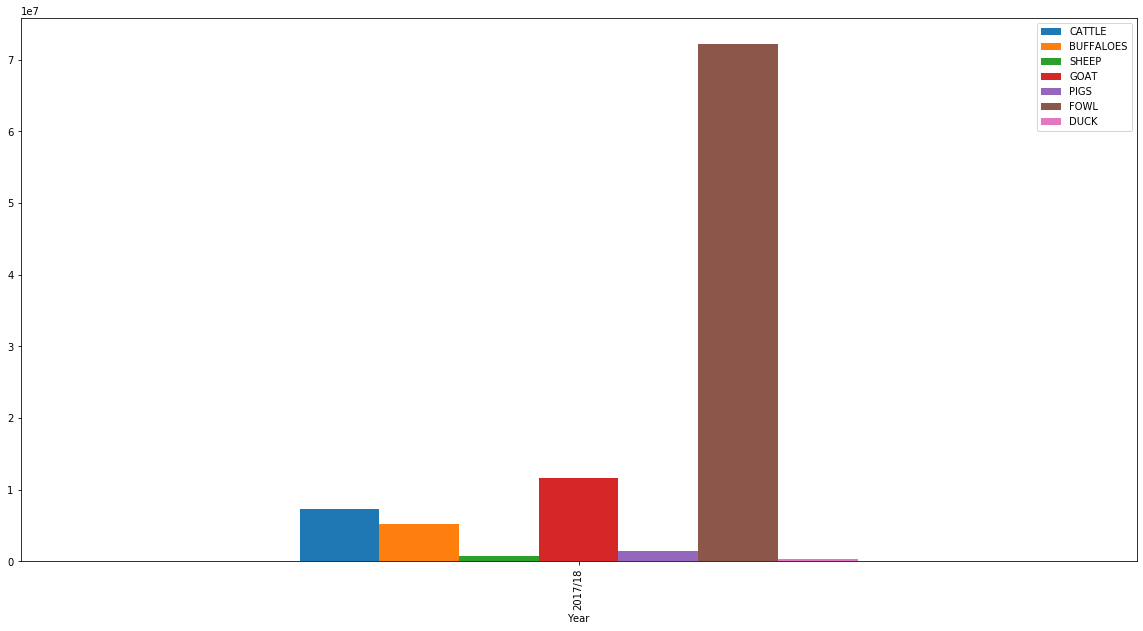

In [23]:
Lat2.plot.bar(figsize=(20,10))

In [29]:
m = folium.Map(location=[28.3949, 84.1240])
m